## Step 2: Data wrangling
In this notebook we are going through the basics of data wrangling using pandas employing the same dataset as the one of the first step.
In order to import the dataset, we use read_csv again, with the only difference that this time, we add the header while importing the dataset.
We use df.head() to visualize the dataset after importing it.

In [1]:
import numpy as np
import pandas as pd 
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
givenHeader = ["symboling","normalized-losses","make","fuel-type","aspiration",
"num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length",
"width","height","curb-weight","engine-type","num-of-cylinder","engine-size",
"fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm",
"city-mpg","highway-mpg","price"]


df = pd.read_csv(url, names =givenHeader )
df.head()




,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Dealing with missing values, Step 1: identifying 

Now we would like to see the ways we can deal with the missing values in our dataset.
First, we should see how to identify the missing data.

### Replacing "?" with nan
by having a look on the dataset we can see that there are several cells in which we have the symbol "?" which represents the missing value, so the first step is replacing "?" with nan  which is Python's default missing value marker.
In order to so we can do it either for a certain column,or for the whole dataset. In order to do the latter for a certain column, we can use list comprehension: So first let's find the boolean vector of the "normalized-losses" column being equal to "?"







In [2]:
df["normalized-losses"]=="?"


0       True
1       True
2       True
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: normalized-losses, Length: 205, dtype: bool

we can now replace those with np.nan

In [3]:
df["normalized-losses"][df["normalized-losses"]=="?"] = np.nan


C:\Users\rjazmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Don't worry if you received a warning

### repalce function 
An easier approach is applying the replace function on the whole dataset: .replace(A, B, inplace = True) 


In [4]:
df.replace("?",np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


 ## Evaluating for Missing Data
 The next step is to identify the missing values. In order to do so, we can use .isnull and .notnull the ouput of which are boolean values



In [5]:
missingValues = df.isnull()

missingValues.head()



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Count missing values in each column
now that we have the boolean equivalent we can use the .value_counts() in order to count the number of True values for each column
so for example for the second  columsn  

In [6]:
missingValues["normalized-losses"].value_counts()

False    164
True      41
Name: normalized-losses, dtype: int64

Next, we can use a for loop in order to find the number of missing value using the above-mentioned command
So I will first define an empty Series called missing_value_count, and then I insert the number of missing value of each column in each iteration:


In [7]:
missing_value_count=pd.Series()
for column in missingValues.columns: 
    #print column+" has the following number of missing values"
    if True in missingValues[column].value_counts().index:
        missing_value_count[column]= missingValues[column].value_counts()[True]
    else:
        missing_value_count[column] = 0
missing_value_count      
    

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinder       0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## How to deal with missing values
#while dealing with missing values, we have several options 
1. droping the data which can be droping the whole row or dropping the whole column:
droping the whole column only make sense in case most of the entries in that column are missing which is not the case for our dataset, though dropping the rows can be meaningful

2. the second apprach is replacing the data:
which  can involve replacing it by the mean of that column, replacing it with the most frequent item of the colmn or replacing using other functions. Each of these approaches can be used based on the properties of the data given in each column. We will apply each method to many different columns. For the columns with continuos values ("normalized-losses","stroke","bor","horsepower","peak-rpm") we repalce them with the mean. For the rather categorical variables ("num-of-doors") we replace it by the most frequent values. In other words, 84% sedans is four doors. Since four doors is most frequent, it is most likely to be the one of the missing values. For the prices insteas since only four rows have missing value and it the value that we are predicting, we simply remove those fow rows.



## Continous numerical variables
So first let's first calculate the avarage of normalized losses, Since the format of the normalized losses is an object and not a float, in order to find their average, we should first convert them all to float using .astype("float) and then use the function .mean() to find their average, we then use the .replace(), to replace the nan values with the determined average value



In [8]:
avg_normalized_losses = df["normalized-losses"].astype("float").mean()
# Now we should use replace to replace the nan values with the determiend average
df["normalized-losses"].replace(np.nan, avg_normalized_losses,inplace=True)


We will then do the same step for all of the columns with continous numeric values

In [9]:
    
avg_stroke = df["stroke"].astype("float").mean()
df["stroke"].replace(np.nan, avg_stroke,inplace=True)

avg_bore = df["bore"].astype("float").mean()
df["bore"].replace(np.nan, avg_bore,inplace=True)

avg_horsepower= df["horsepower"].astype("float").mean()
df["horsepower"].replace(np.nan, avg_horsepower,inplace=True)

avg_horsepower= df["horsepower"].astype("float").mean()
df["horsepower"].replace(np.nan, avg_horsepower,inplace=True)

avg_peak_rpm= df["peak-rpm"].astype("float").mean()
df["peak-rpm"].replace(np.nan, avg_peak_rpm,inplace=True)



## categorical variables
Next, We would like to deal with the missing values in the columns with categorical variables, "num-of-doors" in the only one in this dataset. So we shoud first find the number of times each values appears:


In [10]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can find the msot frequent value with idxmax()

In [11]:
MostFrquent_num_of_doors = df["num-of-doors"].value_counts().idxmax()

we can now replace the np.nan values with the determined most frequent value.

In [12]:
df["num-of-doors"].replace(np.nan, MostFrquent_num_of_doors, inplace=True)

## Missing values in the target column
For the case of the price column, since it is the value that we are going to predict, we simply remove every row, the price of which is missing, (dropna(subset=["column1"])

In [13]:
df.dropna(subset=["price"],axis=0, inplace=True)

since we have dropped some rows, we have to reset the index

In [14]:
df.reset_index(drop=True, inplace=True)

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Final check to be sure no missing value has remained
In order to check whether there are any remaining missing values, we employ the for loop that we had utilized before

In [15]:
missingValues = df.isnull() 
missing_value_count_toCheck=pd.Series()
for column in missingValues.columns: 
    if True in missingValues[column].value_counts().index:
        missing_value_count_toCheck[column]= missingValues[column].value_counts()[True]
    else:
        missing_value_count_toCheck[column] = 0
missing_value_count_toCheck

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinder      0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Format Conversion
Before proceeding, as we previously saw the data format of some rows should be changed. First , let's have a look


In [16]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinder       object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

So we can see that the format of bore, stroke, price, peak-rpm, should be converted to "float"
the format of normalized-losses instead should be con eerted to int  so:

In [17]:
df[["bore","stroke","price", "peak-rpm"]] =  df[["bore","stroke","price", "peak-rpm"]].astype("float")
df["normalized-losses"] =  df["normalized-losses"].astype("int")
df.dtypes


symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinder       object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardization
NOw let's standardize some of the columns, we would like to convert city-mpg and highway-mpg into L/100km units, to do so:


In [18]:
df["city-L/100km"] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]


## Data Normalization
Now we would like to convert some of the column values so that they would be between 0 and 1. We would apply the latter on the length, width and height.

In [19]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

##Binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins'. An example, in our dataset, we can categorize the cars which have high, medium or low horsepower,so we have to convert the horsepower variable which is a continuos number into three categorical variables

As the firt step, we convert the horsepower into float and then we find the width of each bin, for which we should divide the distance between the maximum and minimum value of that column by the number of bins +1.

In [20]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4

We can then create the bins using numpy arange

In [21]:
bins = np.arange(min(df["horsepower"]),max(df["horsepower"]),binwidth)

We can now create labels for the bins, and use the pd.cut to convert the numbers into bins

In [22]:
groupNames = ["Low","Medium", "High"]
df["horsepower-binned"]= pd.cut(df["horsepower"],bins, labels=groupNames, include_lowest= True)

To check if we have correctly converted the numbers we can have a look using .head() on these two columns.

In [23]:
df[["horsepower","horsepower-binned"]].head(30)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


## Bin visualisation 
Another way of showing the numbers in a binned way, is employing histogram:

<IPython.core.display.Javascript object>


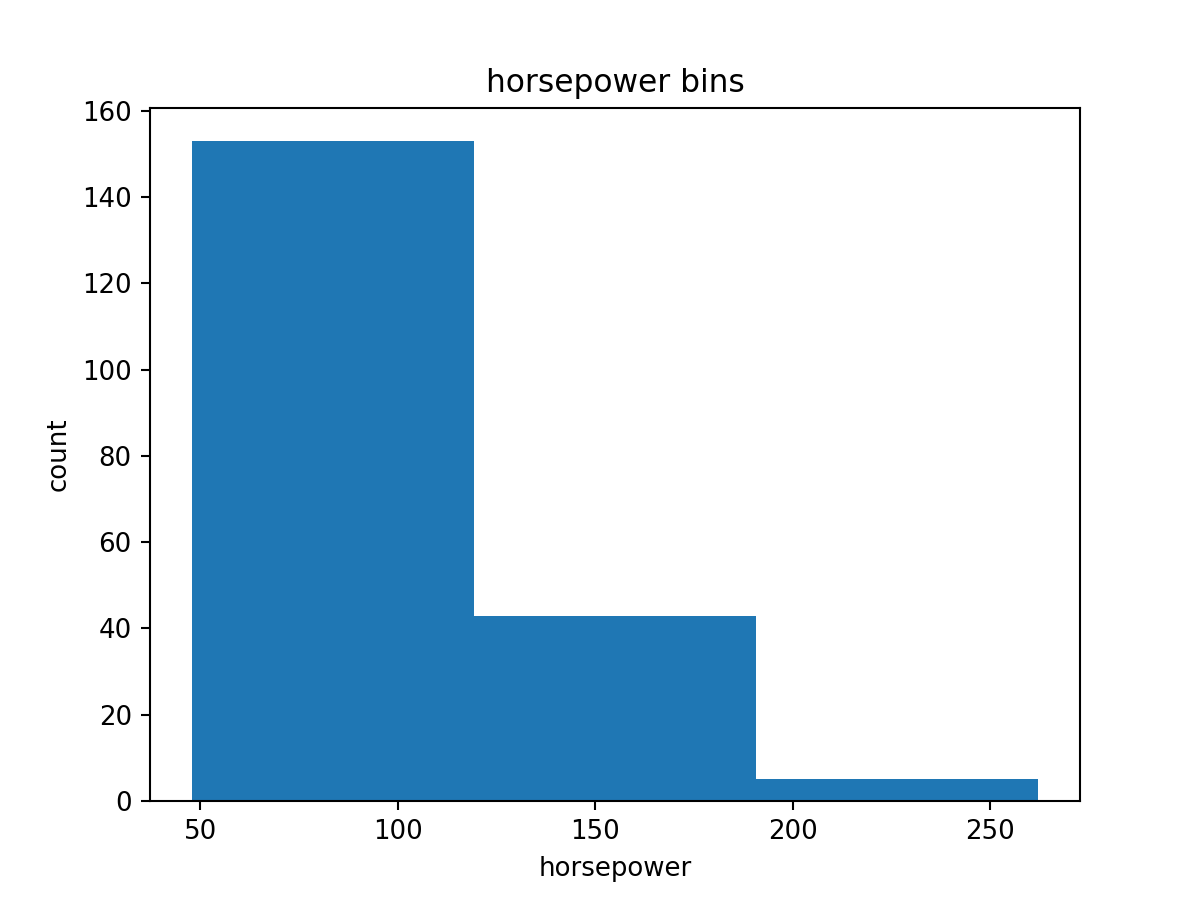

Text(0.5,1,'horsepower bins')

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(df["horsepower"], bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")


## Converting unique values into dummy(indicator) variables
 In order to use the unquie values of some columns as categorical variables which are later used in the regression analysis, we have to first convert them into dummy variables
Dummy variables are numerical variables that represent categories.
Example, the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

In [25]:
dummy_variables_fuelType= pd.get_dummies(df["fuel-type"])
dummy_variables_fuelType.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In order to give a better representation, we can rename these two columns:

In [26]:
dummy_variables_fuelType.rename(columns={"gas":'fuel-type-diesel',"diesel":'fuel-type-diesel'}, inplace=True)


Finally, we can add these two columns (which are actually a dataframe) via concat, and drop the fuel type column

In [27]:
df=pd.concat([df, dummy_variables_fuelType],axis=1)

In [28]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-diesel
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Medium,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Medium,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Medium,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Medium,0,1


We can finally save this formatted dataset

In [29]:
df.to_csv("Car_dataset_formatted.csv")